In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


In [2]:
data = pd.read_csv('anscombe.csv',index_col=[0])
data.head()

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47


<Axes: xlabel='x4', ylabel='y4'>

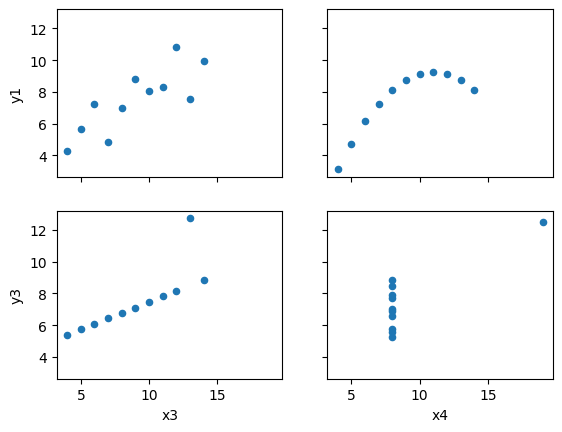

In [6]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
data.plot.scatter(x='x1', y='y1', ax=axs[0,0])
data.plot.scatter(x='x2', y='y2', ax=axs[0,1])
data.plot.scatter(x='x3', y='y3', ax=axs[1,0])
data.plot.scatter(x='x4', y='y4', ax=axs[1,1])



In [22]:
a = linregress(data[['x1', 'y1']])
b = linregress(data[['x2', 'y2']])
c = linregress(data[['x3', 'y3']])
d = linregress(data[['x4', 'y4']])

results = pd.DataFrame({
    'slope': [a.slope, b.slope, c.slope, d.slope],
    'intercept': [a.intercept, b.intercept,  c.intercept, d.intercept],
    }, index=['a', 'b', 'c', 'd'])
results

,slope,intercept
a,0.500091,3.000091
b,0.500000,3.000909
c,0.499727,3.002455
d,0.499909,3.001727


In [28]:
corrs = pd.DataFrame({
    'corr': [
                data[['x1', 'y1']].corr()['x1']['y1'],
                data[['x2', 'y2']].corr()['x2']['y2'],
                data[['x3', 'y3']].corr()['x3']['y3'],
                data[['x4', 'y4']].corr()['x4']['y4'],

            ],
    }, index=['a', 'b', 'c', 'd'])
corrs

,corr
a,0.816421
b,0.816237
c,0.816287
d,0.816521


In [29]:
a_r = linregress(data[['y1', 'x1']])
b_r = linregress(data[['y2', 'x2']])
c_r = linregress(data[['y3', 'x3']])
d_r = linregress(data[['y4', 'x4']])

In [35]:
results = pd.DataFrame({
    'slope': [a.slope, b.slope, c.slope, d.slope],
    'intercept': [a.intercept, b.intercept,  c.intercept, d.intercept],
    }, index=['a', 'b', 'c', 'd'])
results

,slope,intercept
a,0.500091,3.000091
b,0.500000,3.000909
c,0.499727,3.002455
d,0.499909,3.001727


In [39]:
data['y1_p'] = a.intercept + a.slope*data['x1']
data['y2_p'] = b.intercept + b.slope*data['x2']
data['y3_p'] = c.intercept + c.slope*data['x3']
data['y4_p'] = d.intercept + d.slope*data['x4']


,x1,x2,x3,x4,y1,y2,y3,y4,y1_p,y2_p,y3_p,y4_p
1,10,10,10,8,8.04,9.14,7.46,6.58,8.001000,8.000909,7.999727,7.001
2,8,8,8,8,6.95,8.14,6.77,5.76,7.000818,7.000909,7.000273,7.001
3,13,13,13,8,7.58,8.74,12.74,7.71,9.501273,9.500909,9.498909,7.001
4,9,9,9,8,8.81,8.77,7.11,8.84,7.500909,7.500909,7.500000,7.001
5,11,11,11,8,8.33,9.26,7.81,8.47,8.501091,8.500909,8.499455,7.001
6,14,14,14,8,9.96,8.10,8.84,7.04,10.001364,10.000909,9.998636,7.001
7,6,6,6,8,7.24,6.13,6.08,5.25,6.000636,6.000909,6.000818,7.001
8,4,4,4,19,4.26,3.10,5.39,12.50,5.000455,5.000909,5.001364,12.500
9,12,12,12,8,10.84,9.13,8.15,5.56,9.001182,9.000909,8.999182,7.001
10,7,7,7,8,4.82,7.26,6.42,7.91,6.500727,6.500909,6.500545,7.001


In [52]:
lengths = pd.DataFrame(
    {
        'SSE': [((data['y1'] - data['y1_p'])**2).mean(), ((data['y2'] - data['y2_p'])**2).mean(),
                ((data['y3'] - data['y3_p'])**2).mean(), ((data['y4'] - data['y4_p'])**2).mean()],
        'SSR': [((data['y1'].mean() - data['y1_p'])**2).mean(), ((data['y2'].mean() - data['y2_p'])**2).mean(),
                ((data['y3'].mean() - data['y3_p'])**2).mean(), ((data['y4'].mean() - data['y4_p'])**2).mean()],        
    }, index=['a', 'b', 'c', 'd']
)
lengths['R^2'] = 1- lengths['SSE'] / lengths['SSR']

In [53]:
lengths

,SSE,SSR,R^2
a,1.251154,2.500909,0.499720
b,1.252390,2.500000,0.499044
c,1.250563,2.497273,0.499229
d,1.249317,2.499091,0.500091


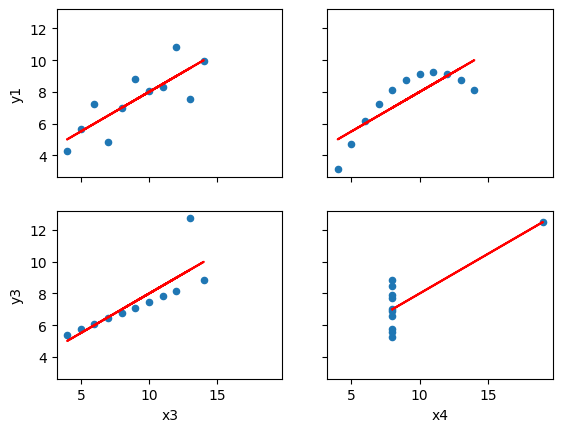

In [37]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
data.plot.scatter(x='x1', y='y1', ax=axs[0,0])
axs[0,0].plot(data['x1'], a.intercept + a.slope*data['x1'], 'r', label='fitted line')
data.plot.scatter(x='x2', y='y2', ax=axs[0,1])
axs[0,1].plot(data['x2'], b.intercept + b.slope*data['x2'], 'r', label='fitted line')
data.plot.scatter(x='x3', y='y3', ax=axs[1,0])
axs[1,0].plot(data['x3'], c.intercept + c.slope*data['x3'], 'r', label='fitted line')
data.plot.scatter(x='x4', y='y4', ax=axs[1,1])
axs[1,1].plot(data['x4'], d.intercept + d.slope*data['x4'], 'r', label='fitted line')

